In [14]:
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from predict.plot_helper import PlotHelper
from predict.stat_tests import StatTestWrapper
from predict.transformations import TransformHelper
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
CSV_AQI_PATH = '../datasources/aqi_calc/'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}

In [16]:
def get_dataframes_for_pollutant(pollutant_id: int) -> dict[str, pd.DataFrame]:
    directory = os.path.join(CSV_AQI_PATH,  str(pollutant_id))
    df_dict = {}
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=True, index_col='DatetimeEnd')
        df_dict[filename[:filename.index('.')]] = df
    return df_dict

In [17]:
pollutant_id = 5
dfs = get_dataframes_for_pollutant(pollutant_id)

Временные ряды AQI. Период: ALL


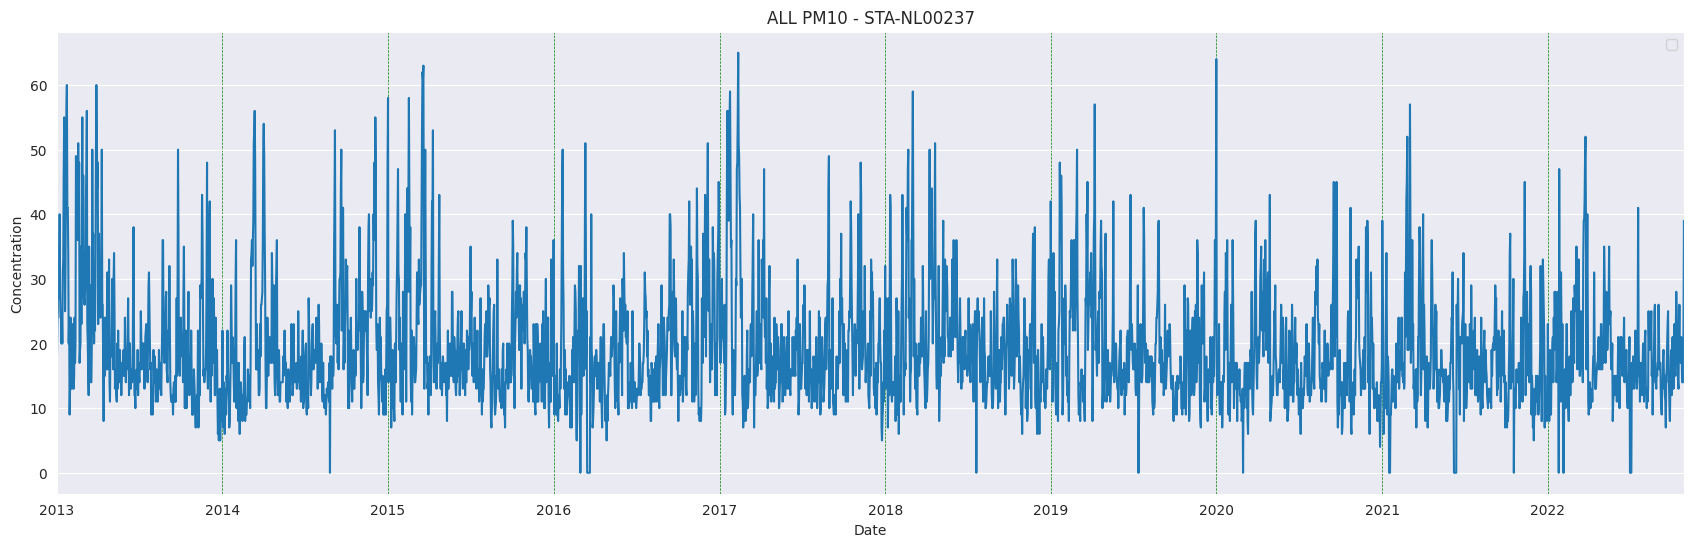

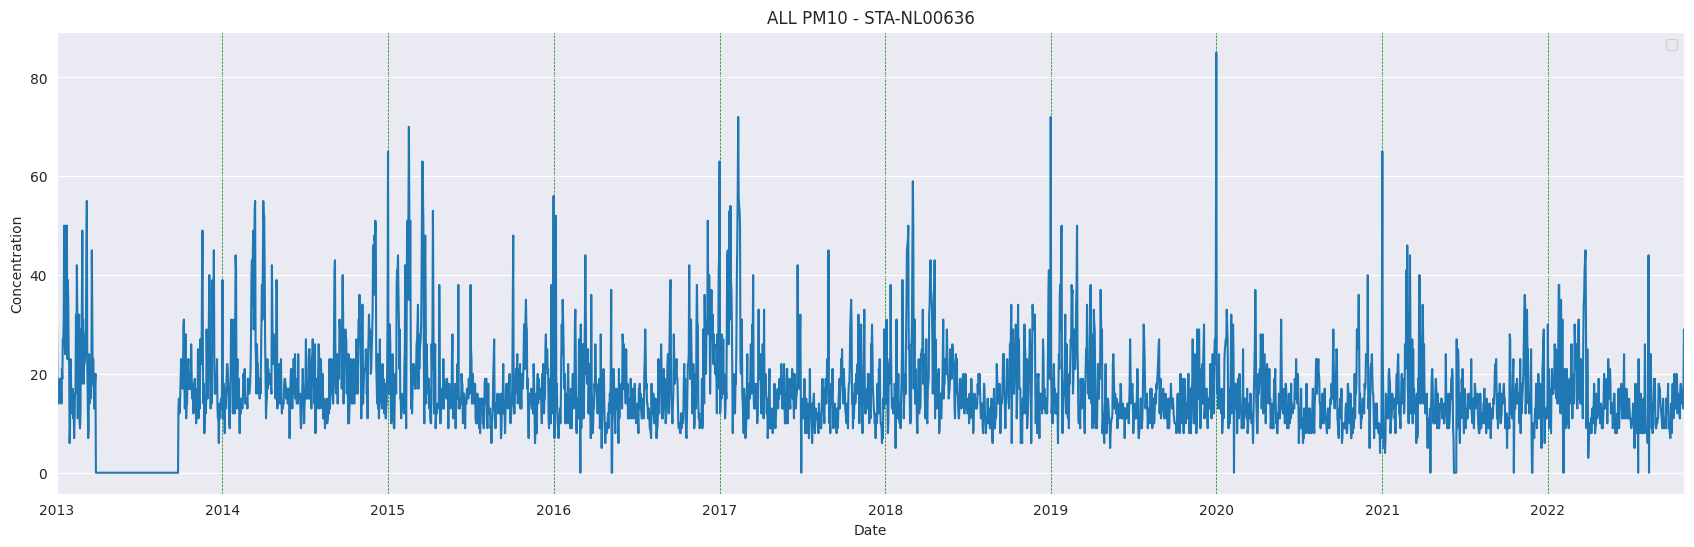

In [18]:
period_name = 'ALL'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: YEAR


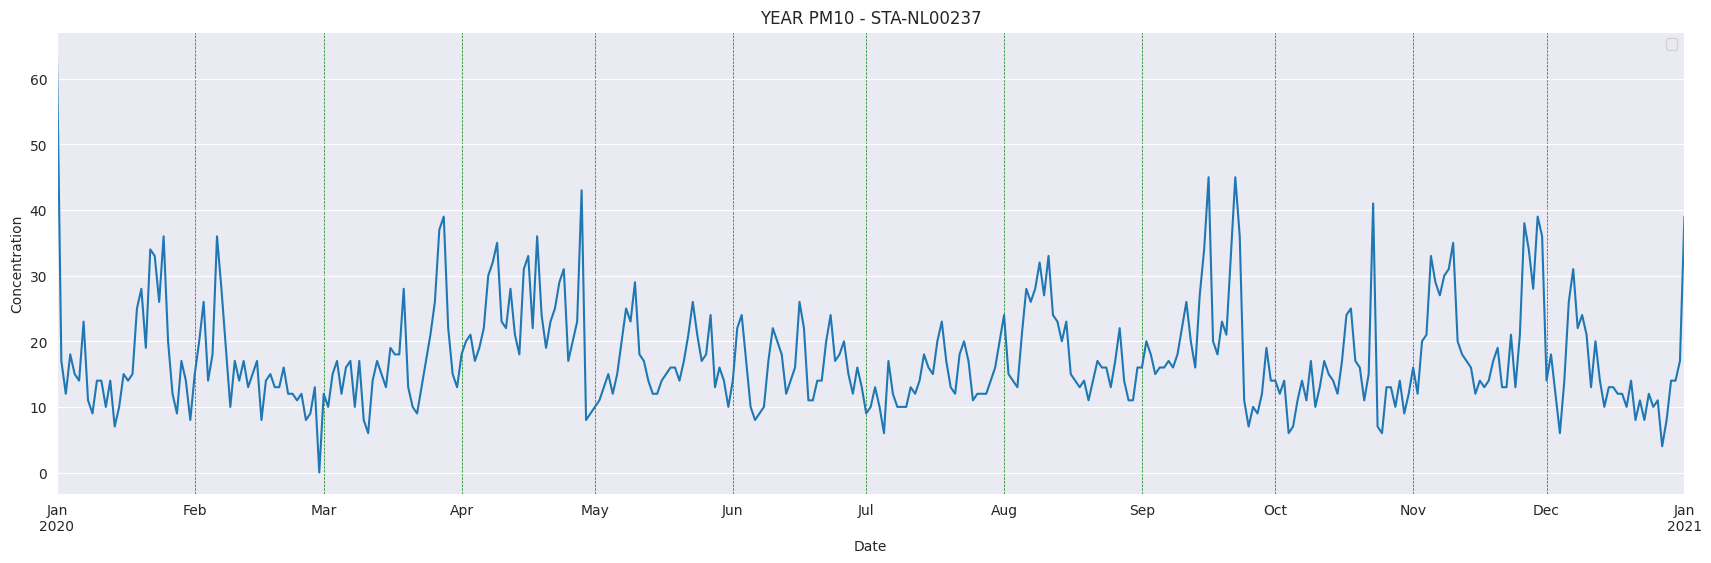

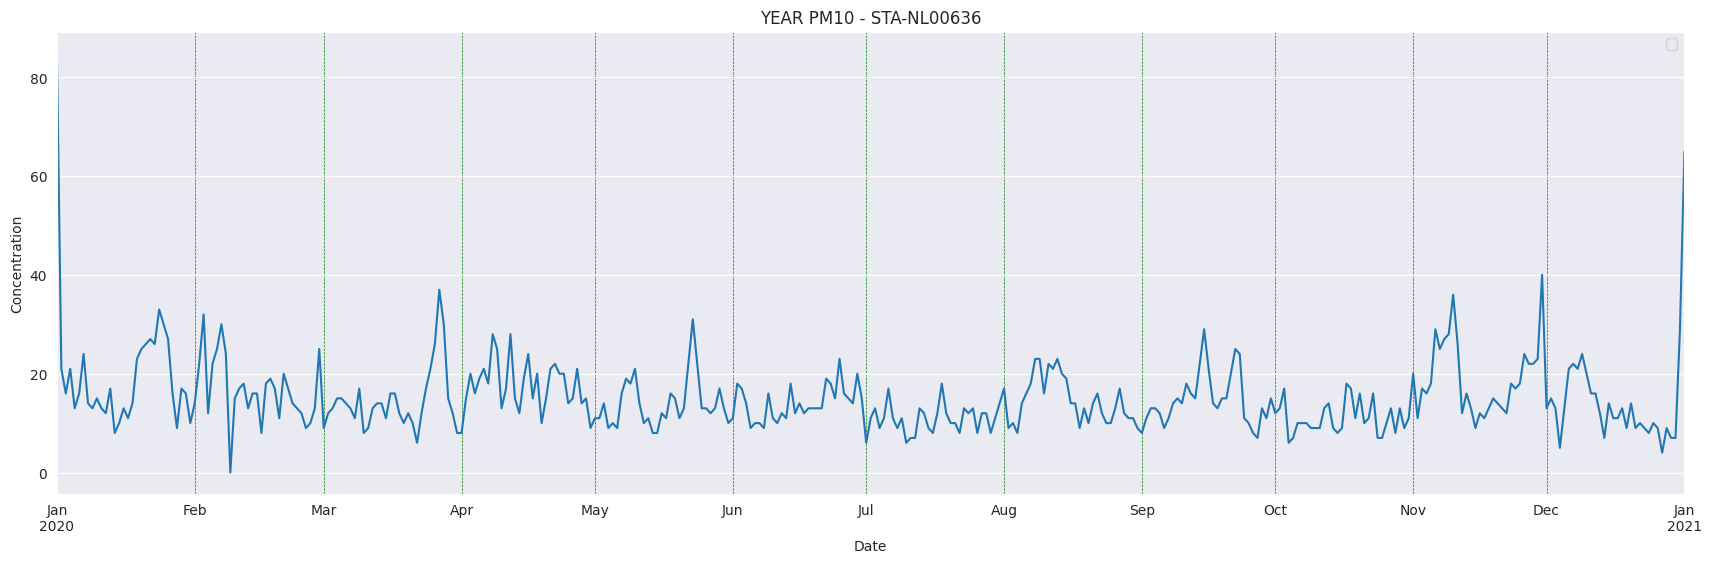

In [19]:
period_name = 'YEAR'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-01-01', date_to='2021-01-01', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: MONTH


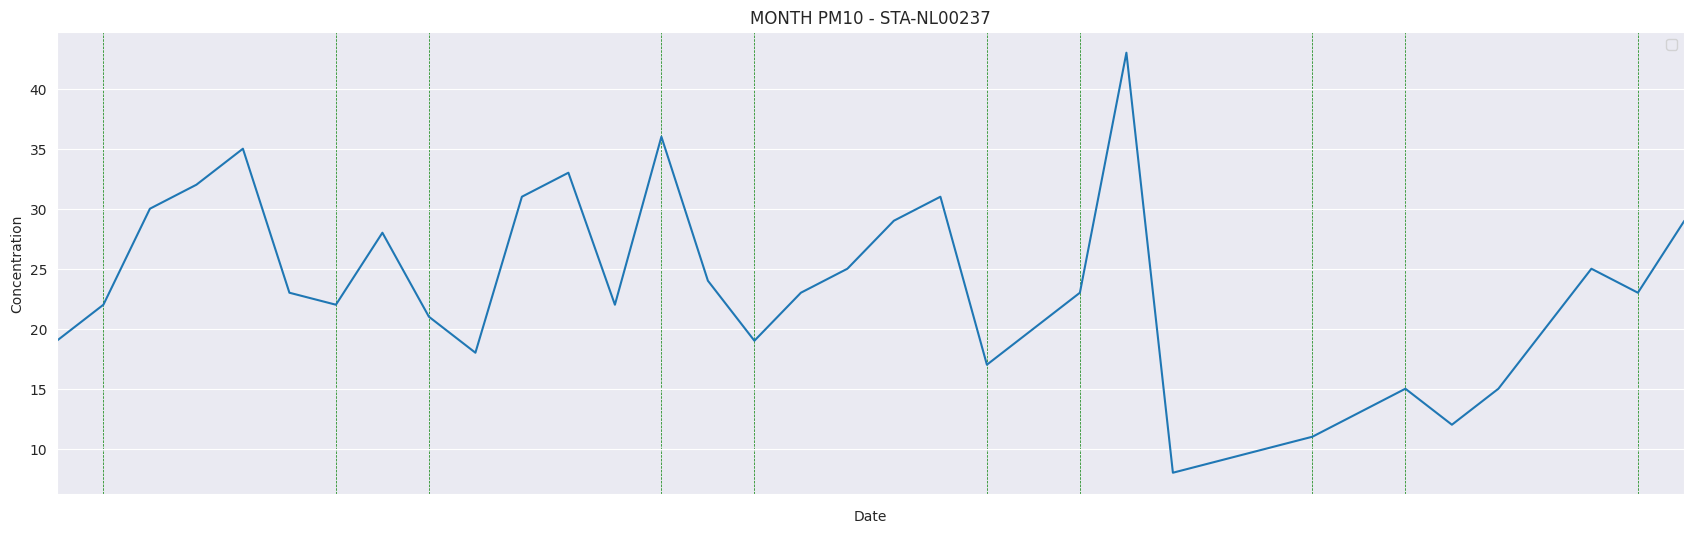

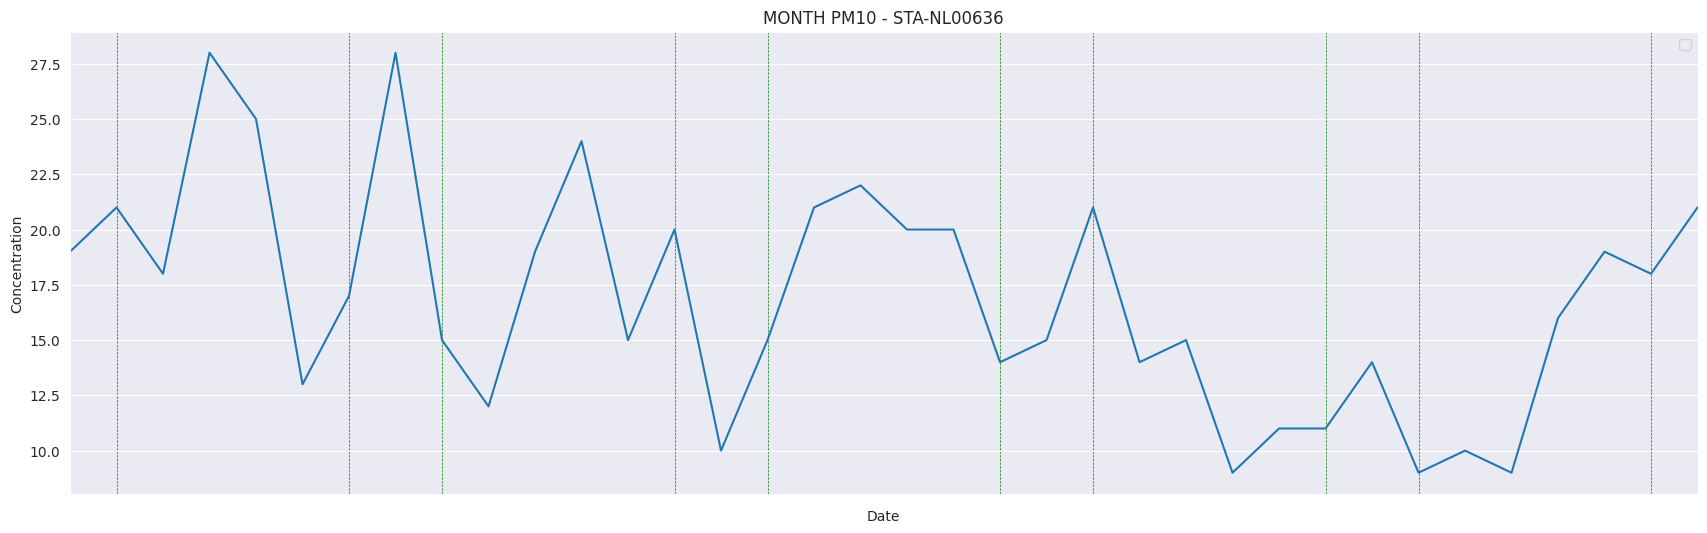

In [20]:
period_name = 'MONTH'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-04-05', date_to='2020-05-10', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}', xticks='w')

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования
-----STA-NL00237-----
ADF Statistic: -9.406501914640597
p-value: 5.991697651475925e-16
maximal Lag: 20
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.7033474942329336
p-value: 0.013241136887915122
maximal Lag: 27
Critical Values:
Stationary


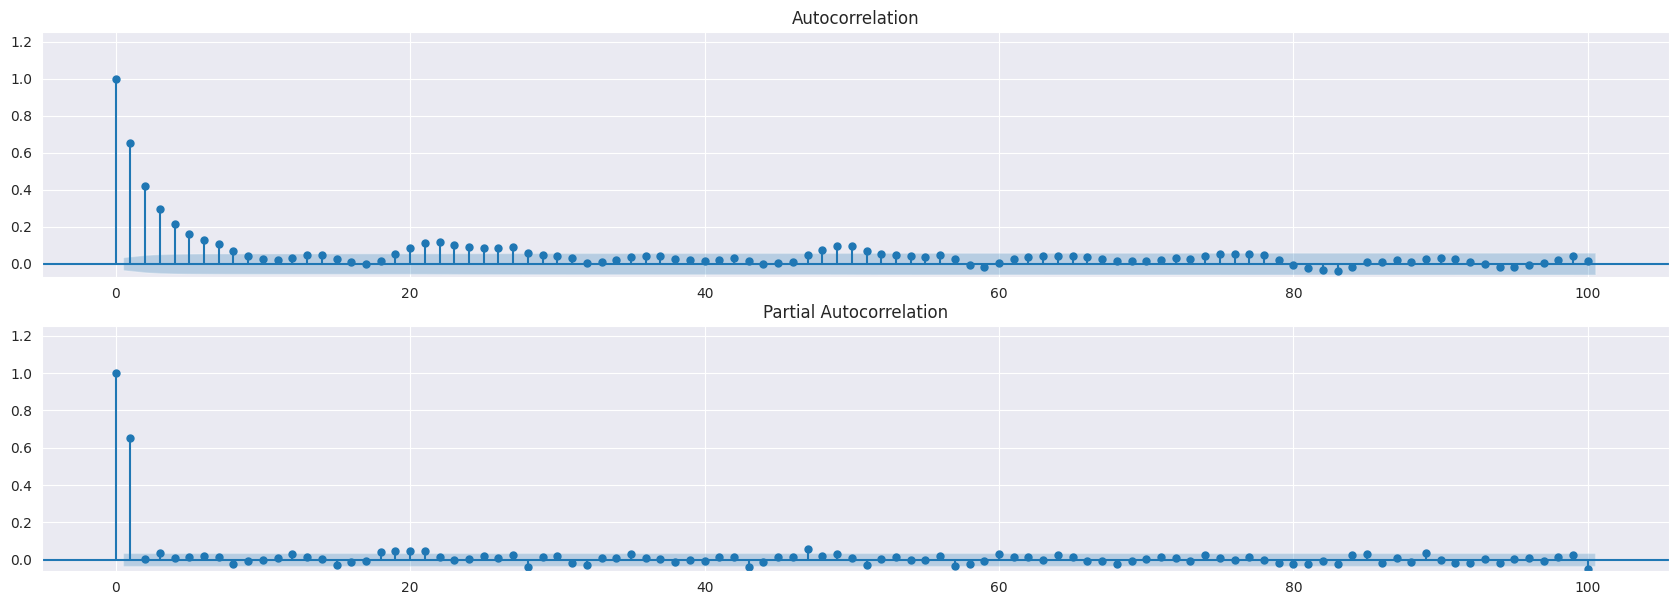

-----STA-NL00636-----
ADF Statistic: -6.430002227607165
p-value: 1.706707702410206e-08
maximal Lag: 26
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 2.2371274891832695
p-value: 0.01
maximal Lag: 29
Critical Values:
Stationary


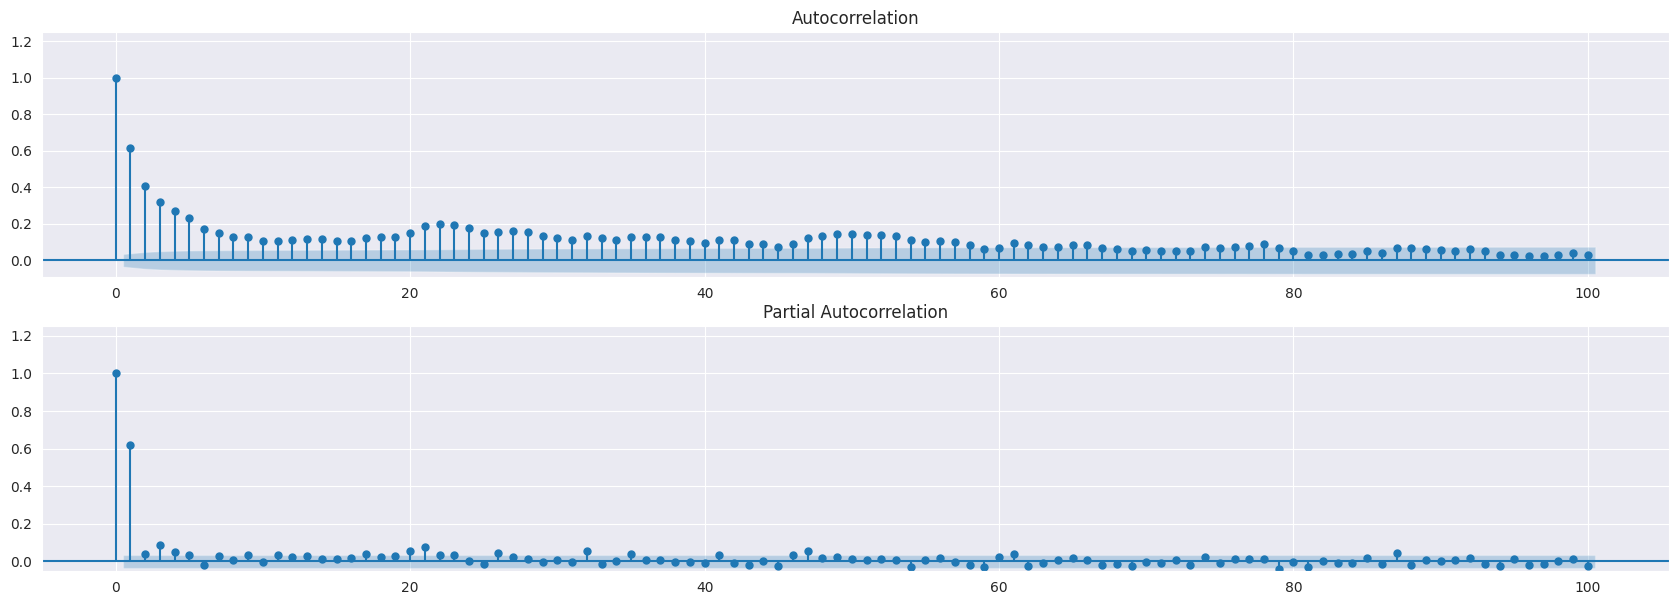

In [25]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k]['2014-01-01':], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году
-----STA-NL00237-----
ADF Statistic: -24.321028307647094
p-value: 0.0
maximal Lag: 0
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary
KPSS Statistic: 0.10287856152741781
p-value: 0.1
maximal Lag: 23
Critical Values:
Non-stationary


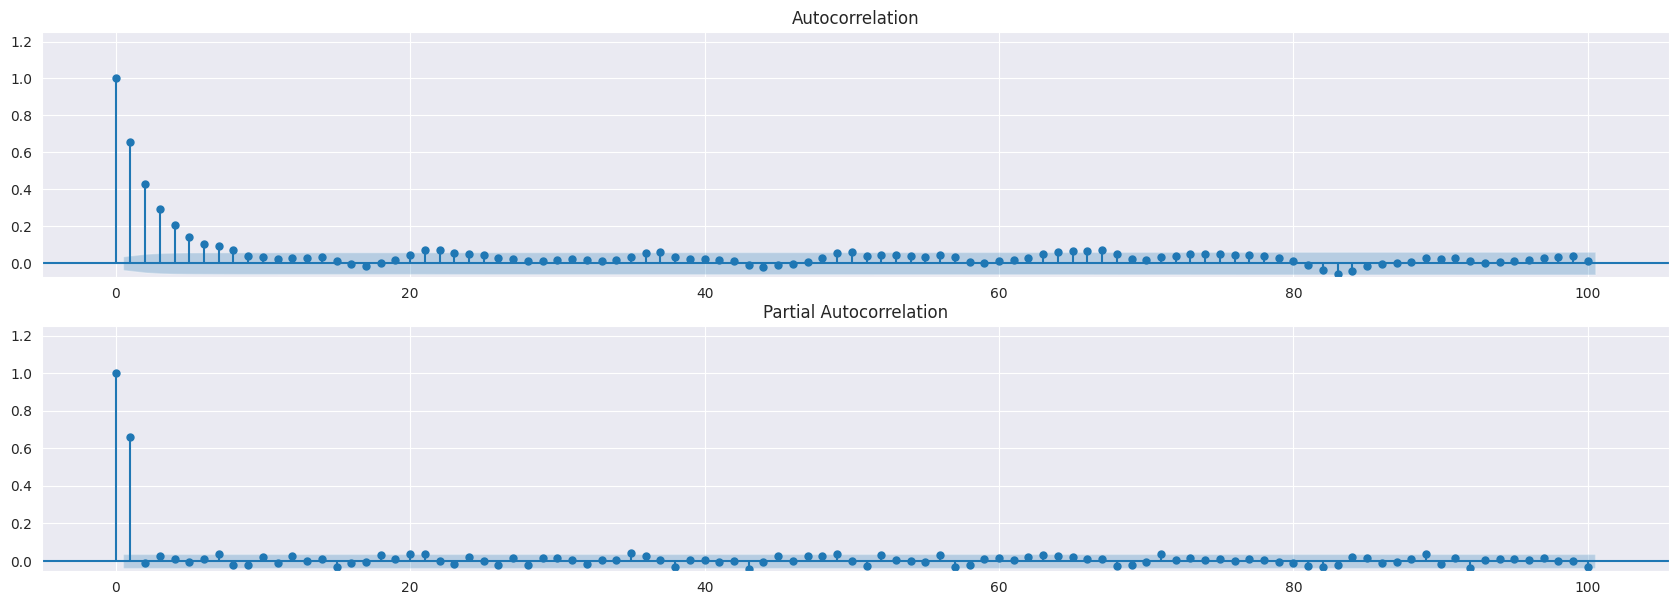

-----STA-NL00636-----
ADF Statistic: -13.027517592343886
p-value: 2.38249631433269e-24
maximal Lag: 10
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary
KPSS Statistic: 0.1557724187899386
p-value: 0.1
maximal Lag: 23
Critical Values:
Non-stationary


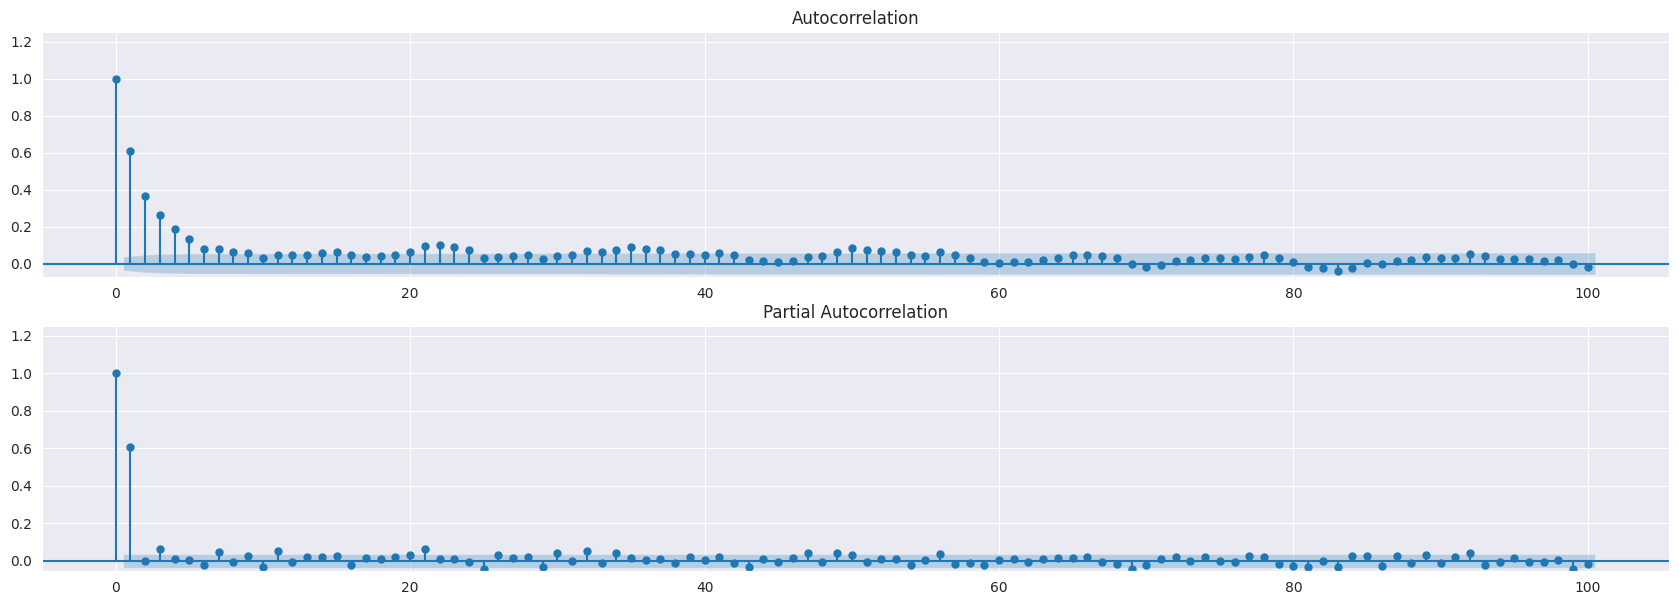

In [26]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k]['2014-01-01':], [('Y', 1)], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе
ADF Statistic: -15.240842401508816
p-value: 5.1654681718865995e-28
maximal Lag: 28
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.002231230471653448
p-value: 0.1
maximal Lag: 6
Critical Values:
Non-stationary


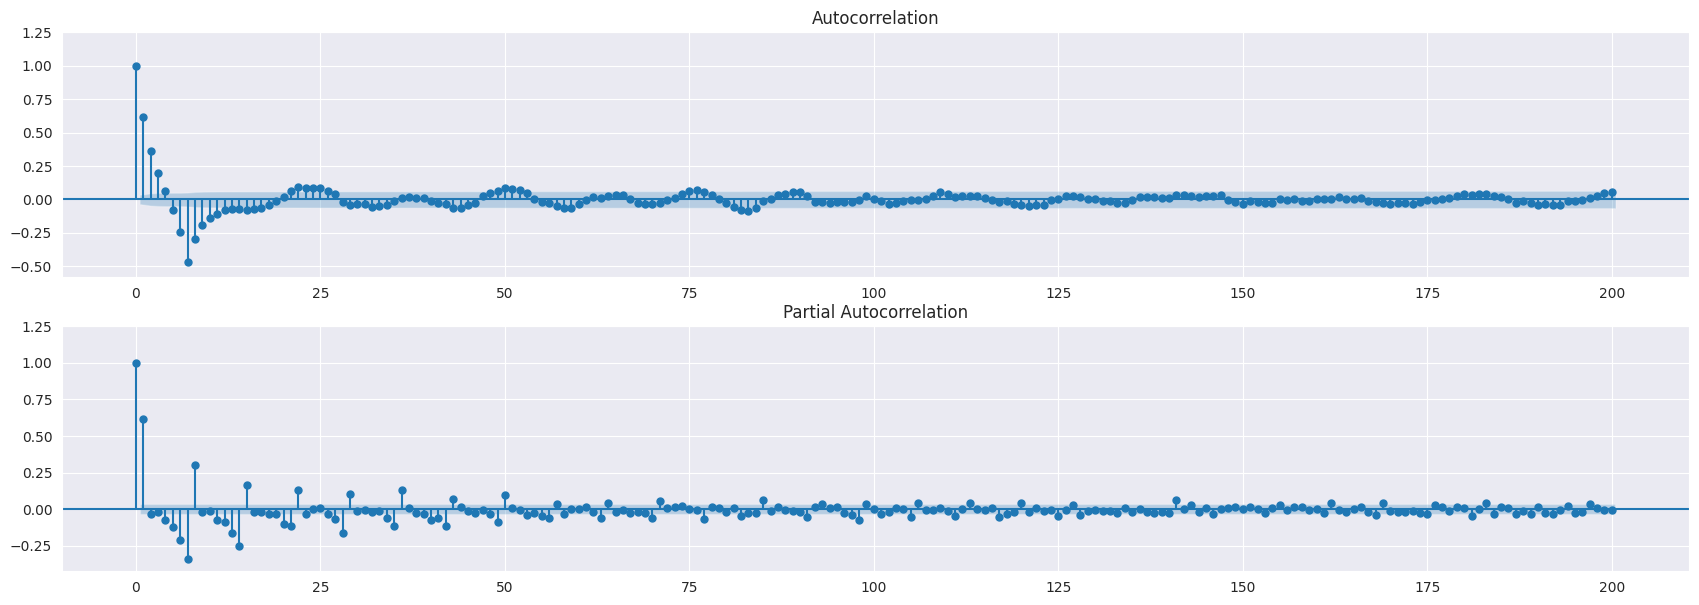

ADF Statistic: -15.61128636877774
p-value: 1.778507996490279e-28
maximal Lag: 28
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.0018468042200418032
p-value: 0.1
maximal Lag: 6
Critical Values:
Non-stationary


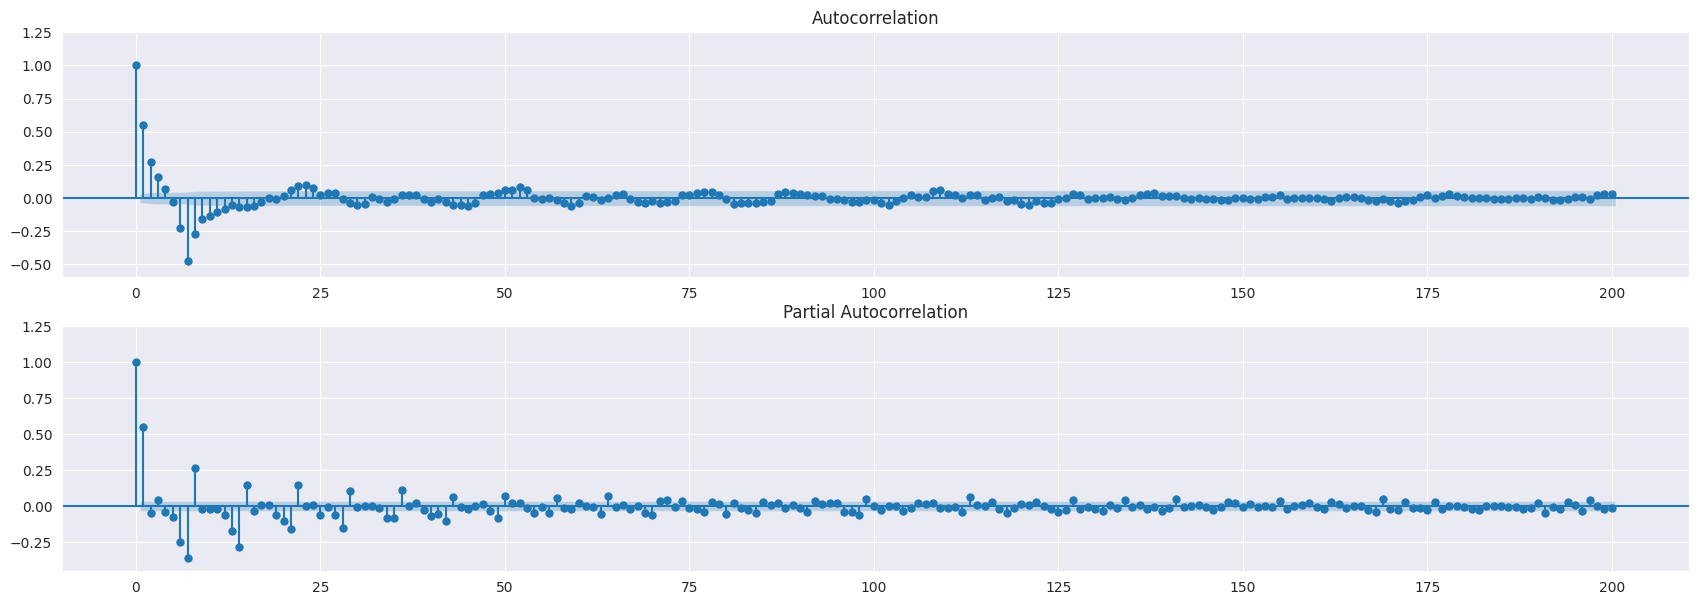

In [27]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k]['2014-01-01':], [('W', 1)])

In [24]:
import datetime

station0 = list(dfs.keys())[1]
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmax()

,AQI
2013,2013-03-08 00:00:00+01:00
2014,2014-03-14 00:00:00+01:00
2015,2015-02-16 00:00:00+01:00
2016,2016-01-01 00:00:00+01:00
2017,2017-02-11 00:00:00+01:00
2018,2018-03-03 00:00:00+01:00
2019,2019-01-01 00:00:00+01:00
2020,2020-01-01 00:00:00+01:00
2021,2021-01-01 00:00:00+01:00
2022,2022-03-25 00:00:00+01:00
